# Install TF Obj Detection API

In [ ]:
# Clone the tensorflow models repository if it doesn't already exist
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3344, done.
remote: Counting objects: 100% (3344/3344), done.
remote: Compressing objects: 100% (2778/2778), done.
remote: Total 3344 (delta 882), reused 1367 (delta 515), pack-reused 0
Receiving objects: 100% (3344/3344), 34.34 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (882/882), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1692480 sha256=1928ac1e1dab3680e809d8e7fc8f6b332f846c9fa6a403a1988942edd00ac34e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ukik79io/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=263b8d5632118895309c0bab1de7d5cb1d2727d35ef082d234c91e0a0a62e97d
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=8c840d0de37284641570fe8dbd7e8525547afce7c801017a76dc260587f8b090
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44010 sha256=9b9b8dcd6e2bc3a490db317b4cfd238ddd27f480e1b60b619b

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
import numpy as np
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import random
import io
import imageio
import glob
import scipy.misc
import json
import os
import shutil
import cv2
from tqdm import tqdm
import pathlib

import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import display
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

from object_detection.utils import config_util
from object_detection.utils import colab_utils
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util

%matplotlib inline

# Export YOLO to TFLite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/YOLO_models.zip

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13599, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 13599 (delta 87), reused 100 (delta 70), pack-reused 13476
Receiving objects: 100% (13599/13599), 12.16 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (9490/9490), done.


In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [ ]:
classes = ['Не та категория товара',
 'Яйца «BIO»',
 'Яйца «Вараксино», категория С1',
 'Яйца «ВкусВилл»',
 'Яйца «Зелёная Линия», категория С1',
 'Яйца «Зерновой откорм»',
 'Яйца «Красная цена», категория С1',
 'Яйца «Красная цена», категория С2',
 'Яйца «Красная цена», категория СО',
 'Яйца «Маркет, Перекресток»',
 'Яйца «Мясновъ», категория С0',
 'Яйца «Мясновъ», категория С1',
 'Яйца «Новая марка», категория С0',
 'Яйца «Окское», категория С1',
 'Яйца «Окское», категория СО',
 'Яйца «Просто», категория С0',
 'Яйца «Роскар — Экстра», категория С1',
 'Яйца «Роскар — Экстра», категория СО',
 'Яйца «Село Зеленое», категория С1',
 'Яйца «Селяночка», категория С1',
 'Яйца «Селяночка», категория СО',
 'Яйца «Хороший день»']

In [ ]:
classes

['Не та категория товара',
 'Яйца «BIO»',
 'Яйца «Вараксино», категория С1',
 'Яйца «ВкусВилл»',
 'Яйца «Зелёная Линия», категория С1',
 'Яйца «Зерновой откорм»',
 'Яйца «Красная цена», категория С1',
 'Яйца «Красная цена», категория С2',
 'Яйца «Красная цена», категория СО',
 'Яйца «Маркет, Перекресток»',
 'Яйца «Мясновъ», категория С0',
 'Яйца «Мясновъ», категория С1',
 'Яйца «Новая марка», категория С0',
 'Яйца «Окское», категория С1',
 'Яйца «Окское», категория СО',
 'Яйца «Просто», категория С0',
 'Яйца «Роскар — Экстра», категория С1',
 'Яйца «Роскар — Экстра», категория СО',
 'Яйца «Село Зеленое», категория С1',
 'Яйца «Селяночка», категория С1',
 'Яйца «Селяночка», категория СО',
 'Яйца «Хороший день»']

In [ ]:
!python export.py --weights /content/yolo_without_badbox.pt --include tflite --data /content/yolov5/data/coco128.yaml --nms

export: data=/content/yolov5/data/coco128.yaml, weights=['/content/yolo_without_badbox.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=True, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.1-204-gf43cd53 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7069459 parameters, 0 gradients

PyTorch: starting from /content/yolo_without_badbox.pt with output shape (1, 25200, 27) (13.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.0...

                 from  n    params  module                                  arguments                     
2022-05-19 18:35:34.253114: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3520

# Visualization

In [ ]:
# --------------------------- CODE TO CHANGE IN TF.PY -------------------------------------
# if tf_nms:
#             boxes = self._xywh2xyxy(x[0][..., :4])
#             probs = x[0][:, :, 4:5]
#             classes = x[0][:, :, 5:]
#             scores = probs * classes
#             if agnostic_nms:
#                 nms = AgnosticNMS()((boxes, classes, scores), topk_all, iou_thres, conf_thres)
#             else:
#                 boxes = tf.expand_dims(boxes, 2)
#                 nms = tf.image.combined_non_max_suppression(boxes,
#                                                             scores,
#                                                             topk_per_class,
#                                                             topk_all,
#                                                             iou_thres,
#                                                             conf_thres,
#                                                             clip_boxes=False)
#             return nms
#         return x[0]  # output only first tensor [1,6300,85] = [xywh, conf, class0, class1, ...]
#         # x = x[0][0]  # [x(1,6300,85), ...] to x(6300,85)
#         # xywh = x[..., :4]  # x(6300,4) boxes
#         # conf = x[..., 4:5]  # x(6300,1) confidences
#         # cls = tf.reshape(tf.cast(tf.argmax(x[..., 5:], axis=1), tf.float32), (-1, 1))  # x(6300,1)  classes
#         # return tf.concat([conf, cls, xywh], 1)

#     def _xywh2xyxy(xywh):
#         # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
#         x, y, w, h = tf.split(xywh, num_or_size_splits=4, axis=-1)
#         return tf.concat([y - h / 2, x - w / 2, y + h / 2, x + w / 2], axis=-1)


In [ ]:
def detect(interpreter, input_tensor, include_keypoint=False):
  """Run detection on an input image.

  Args:
    interpreter: tf.lite.Interpreter
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.
    include_keypoint: True if model supports keypoints output. See
      https://cocodataset.org/#keypoints-2020

  Returns:
    A sequence containing the following output tensors:
      boxes: a numpy array of shape [N, 4]
      classes: a numpy array of shape [N]. Note that class indices are
        1-based, and match the keys in the label map.
      scores: a numpy array of shape [N] or None.  If scores=None, then
        this function assumes that the boxes to be plotted are groundtruth
        boxes and plot all boxes as black with no classes or scores.
      category_index: a dict containing category dictionaries (each holding
        category index `id` and category name `name`) keyed by category
        indices.
    If include_keypoints is True, the following are also returned:
      keypoints: (optional) a numpy array of shape [N, 17, 2] representing
        the yx-coordinates of the detection 17 COCO human keypoints
        (https://cocodataset.org/#keypoints-2020) in normalized image frame
        (i.e. [0.0, 1.0]).
      keypoint_scores: (optional) a numpy array of shape [N, 17] representing the
        keypoint prediction confidence scores.
  """
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  interpreter.set_tensor(input_details[0]['index'], input_tensor)

  interpreter.invoke()
  print(output_details)
  output_data = interpreter.get_tensor(output_details[0]['index'])
  classes = interpreter.get_tensor(output_details[1]['index'])
  scores = interpreter.get_tensor(output_details[2]['index'])
  num_detections = interpreter.get_tensor(output_details[3]['index'])
  # output_data_1 = interpreter.get_tensor(output_details[0]['index'])
  # output_data_2 = interpreter.get_tensor(output_details[1]['index'])
  # boxes = interpreter.get_tensor(output_details[1]['index'])
  # num_detections = interpreter.get_tensor(output_details[2]['index'])
  # classes = interpreter.get_tensor(output_details[3]['index'])

  if include_keypoint:
    kpts = interpreter.get_tensor(output_details[4]['index'])
    kpts_scores = interpreter.get_tensor(output_details[5]['index'])
    return boxes, classes, scores, num_detections, kpts, kpts_scores
  else:
    return output_data, classes, scores, num_detections

# Utility for visualizing results
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    keypoints=None,
                    keypoint_scores=None,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    keypoints: (optional) a numpy array of shape [N, 17, 2] representing the
      yx-coordinates of the detection 17 COCO human keypoints
      (https://cocodataset.org/#keypoints-2020) in normalized image frame
      (i.e. [0.0, 1.0]).
    keypoint_scores: (optional) anumpy array of shape [N, 17] representing the
      keypoint prediction confidence scores.
    figsize: size for the figure.
    image_name: a name for the image file.
  """

  keypoint_edges = [(0, 1),
        (0, 2),
        (1, 3),
        (2, 4),
        (0, 5),
        (0, 6),
        (5, 7),
        (7, 9),
        (6, 8),
        (8, 10),
        (5, 6),
        (5, 11),
        (6, 12),
        (11, 12),
        (11, 13),
        (13, 15),
        (12, 14),
        (14, 16)]
  image_np_with_annotations = image_np.copy()
  # Only visualize objects that get a score > 0.3.
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=keypoint_edges,
      use_normalized_coordinates=True,
      max_boxes_to_draw=False,
      min_score_thresh=0.0)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    return image_np_with_annotations

(1, 960, 1280, 3)
[{'name': 'StatefulPartitionedCall:0', 'index': 555, 'shape': array([  1, 100,   4], dtype=int32), 'shape_signature': array([  1, 100,   4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 558, 'shape': array([1], dtype=int32), 'shape_signature': array([1], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 557, 'shape': array([  1, 100], dtype=int32), 'shape_signature': array([  1, 100], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float

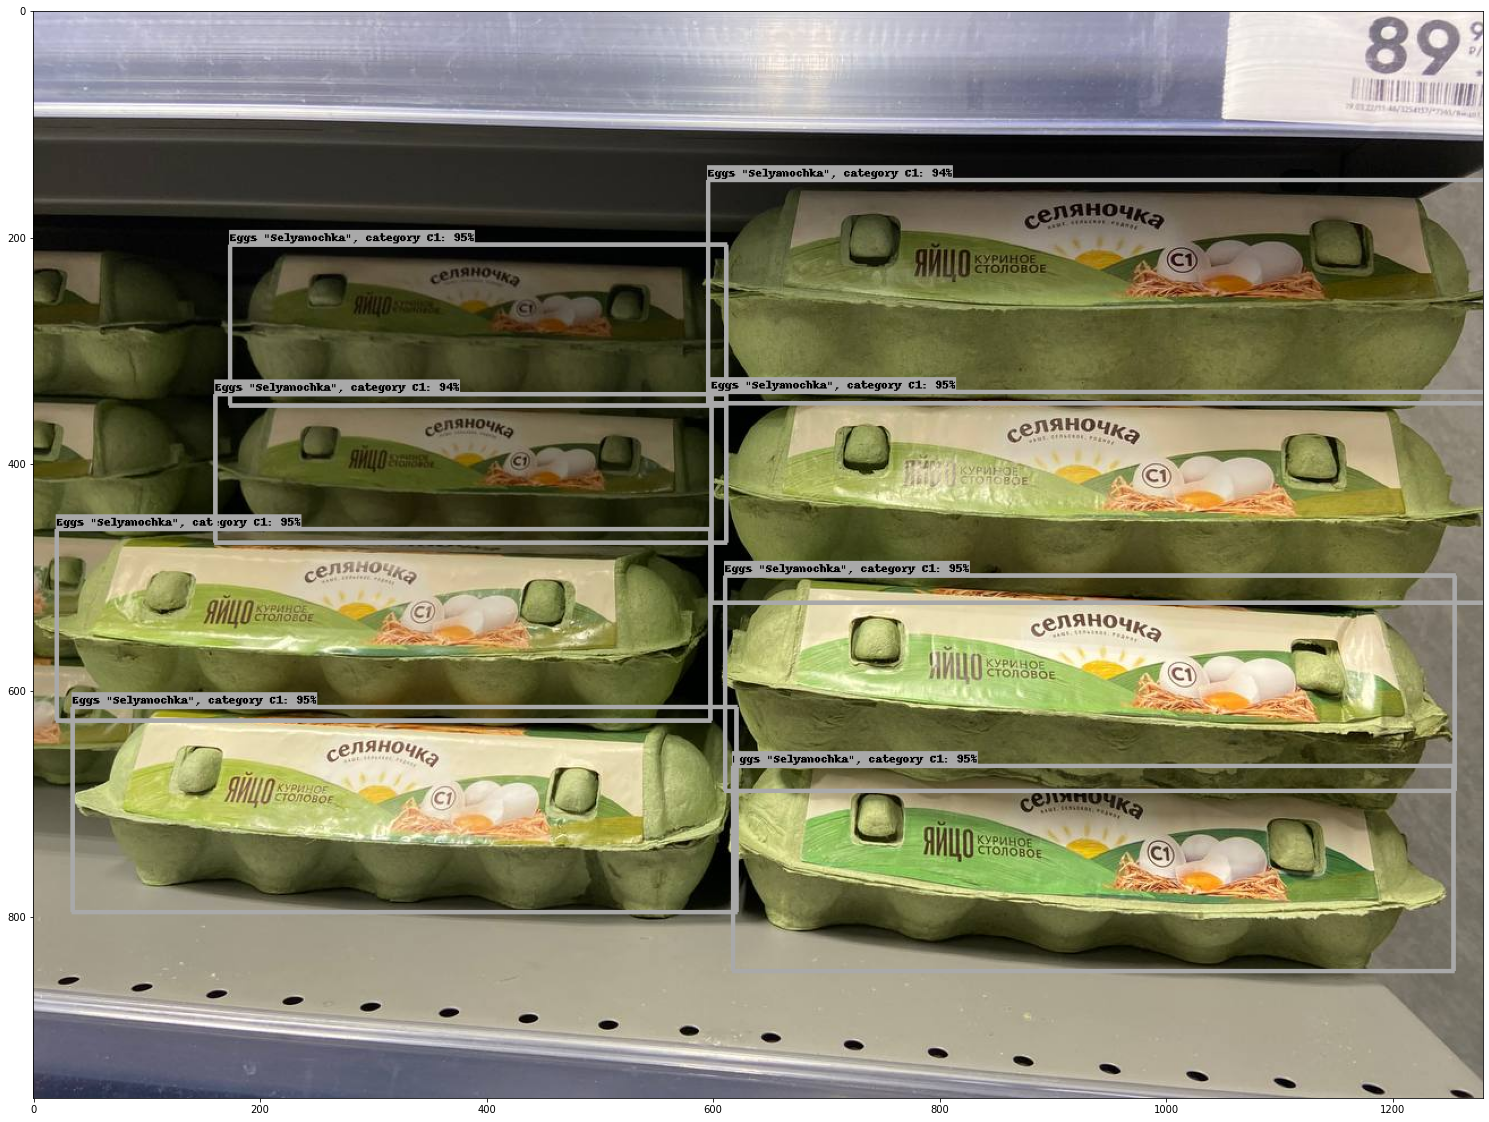

In [ ]:
from PIL import Image, ImageOps
# Load the TFLite model and allocate tensors.
model_path = '/content/yolo_without_badbox-fp16.tflite'
label_map_path = '/content/label_map_english.txt'

# Initialize TensorFlow Lite Interpreter.
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Label map can be used to figure out what class ID maps to what
# label. `label_map.txt` is human-readable.
category_index = label_map_util.create_category_index_from_labelmap(
    label_map_path)

# for k, v in category_index.copy().items():
#     v['name'] = 'asd'
#     category_index[k] = v



# image = tf.io.read_file('/content/IMG_20220403_153543.jpg')
# image = tf.compat.v1.image.decode_jpeg(image)
# image = tf.expand_dims(image, axis=0)
original_image = Image.open('/content/photo_2022-03-25_21-42-36.jpg')
image = ImageOps.exif_transpose(original_image)
image_numpy = np.array(image)
image_numpy = np.expand_dims(image_numpy, axis=0)
# image_numpy = image.numpy()
print(image_numpy.shape)

input_tensor = tf.convert_to_tensor(image_numpy, dtype=tf.float32)

input_tensor = tf.image.resize(image_numpy / 255.0, (640, 640))
input_tensor = tf.dtypes.cast(input_tensor, tf.float32)

boxes, num_detections, classes, scores = detect(interpreter, input_tensor)
# print(boxes[0])
# boxes[:, 0] = boxes_copy[:, 1] - boxes_copy[:, 3] / 2
# print(boxes)
# output_copy = output.copy()
# print(type(classes[0]))
# print(boxes[0][0, :])
# boxes = np.squeeze(boxes)
# print(scores)
# print(boxes)
ImageFont.truetype('/content/times new roman.ttf', 128)
vis_image = plot_detections(
    image_numpy[0],
    boxes[0],
    classes[0].astype(np.uint32) + 1,
    scores[0],
    category_index)
plt.figure(figsize = (30, 20))
plt.imshow(vis_image)